In [11]:
import numpy as np
import keyboard
import time
import random

In [12]:
# Function to map key input to player move
def get_player_move():
    # return random.randint(0, 3) % 3
    try:
        if keyboard.is_pressed('r'):
            return 0  # Rock
        elif keyboard.is_pressed('p'):
            return 1  # Paper
        elif keyboard.is_pressed('s'):
            return 2  # Scissors
    except Exception as e:
        print(f"Error: {e}")
    return None

def convolve1point5d(arr1, arr2):
    result = np.zeros((arr1.shape[0] + arr2.shape[0] - 1, arr1.shape[1]), np.uint8)
    #result = np.zeros((max(arr1.shape[0], arr2.shape[0]), arr1.shape[1]), np.float32)
    for i in range(arr1.shape[1]):
        result[:, i] = np.convolve(arr1[:, i].astype(np.float32), arr2[:, i].astype(np.float32) * np.linspace(0, 1, arr2.shape[0]), 'full')
    return result

# Function to get machine's move (random for now)
def get_machine_move(master_buffer, n = 10):
    # Simulate different scenarios for player moves
    scenarios = []
    
    # Create 9 copies for each player move (win/lose/tie scenarios)
    for player_move in range(3):  # Rock, Paper, Scissors
        for machine_move in range(3):  # 0: Lose, 1: Win, 2: Tie
            scenario = np.zeros((n, 12), dtype = np.uint8)
            scenario[-n:-1] = master_buffer[1-n:]
            scenario[-1] = get_arr(machine_move, player_move)
            scenarios.append(scenario)
    
    # Convolve each scenario with the main buffer
    scores = []
    for scenario in scenarios:
        #score = np.max(np.sum(convolve1point5d(master_buffer, scenario), axis=1))
        test = np.sum(convolve1point5d(master_buffer, scenario), axis=1)
        score = np.mean( test * np.linspace(0.8, 1.2, test.shape[0]))
        scores.append(score)
    print(scores.index(max(scores)))
    return ((scores.index(max(scores)) // 3) + 1) % 3

In [13]:
import random

# Function to generate the machine's move and the equation
def proof(machine_move):
    # Step 1: Get a random number between 100 and 200
    base = random.randint(100, 200) * 2 + 1
    
    # Step 2: Get a random number between 10,000 and 100,000
    power = random.randint(10000, 100000)
    
    # Step 3: Get a random number between 1 million and 10 million
    modulo = random.randint(1000000, 10000000) * 2 + 1
    
    # Step 4: Calculate base raised to power modulo
    result = pow(base, power, modulo)  # Efficient calculation of (base^power) % modulo
    
    # Step 5: Calculate constant using the new formula
    constant = (modulo - result + machine_move) # Adjust constant

    # Equation string
    equation = f"({base} ** {power} + {constant}) % {modulo}"
    
    return equation

In [14]:
metrics = [
    "comp0",
    "comp1",
    "comp2",
    "play0",
    "play1",
    "play2"
] # and inverted

master_buffer = np.zeros((1000, 12), dtype=np.uint8)

def get_arr(machine, player): #, prev_arr):
    move = np.zeros(12, dtype=np.uint8)
    move[machine] = 0
    move[player + 3] = 1
    #if (player, machine) in [(0, 1), (1, 2), (2, 0)]:
    #    move[3] = 1
    #move[7] = np.all(prev_arr[3:6] == move[3:6])
    move[6:] = 1 - move[:6]
    return move


In [15]:
# Game loop
def game_loop():
    move_count = 1
    win_count = 0
    loss_count = 0

    while True:

        # Get machine's move
        machine_move = get_machine_move(master_buffer)
        # print( proof(machine_move) )
        
        player_move = None

        # Wait for player move
        while player_move is None:
            player_move = get_player_move()
            time.sleep(0.01)
            
        # Get previous move array for feature extraction
        prev_arr = master_buffer[-1] if move_count > 0 else np.zeros(10, dtype=np.uint8)

        # Update buffer with new move by shifting
        master_buffer[:-1] = master_buffer[1:]
        master_buffer[-1] = get_arr(machine_move, player_move)

        # Print moves
        print(f"Player Move: {['Rock', 'Paper', 'Scissors'][player_move]}, Machine Move: {['Rock', 'Paper', 'Scissors'][machine_move]}")

        if (player_move, machine_move) in [(0, 1), (1, 2), (2, 0)]:
            win_count += 1
        elif (machine_move, player_move) in [(0, 1), (1, 2), (2, 0)]:
            loss_count += 1

        print("WIN RATE", win_count / move_count)
        print("LOSS RATE", loss_count / move_count)
        # Increment move count
        move_count += 1

        if move_count > 100:
            return

        time.sleep(0.1)
        # Optional: add a small delay to make it easier to press keys in a timely manner
        # start_time = time.time()
        # while time.time() - start_time < 1:
        #    if keyboard.is_pressed('b'):
        #        return
        #     else:
        #         time.sleep(0.01)

# Run the game loop
game_loop()

0
Player Move: Rock, Machine Move: Paper
WIN RATE 1.0
LOSS RATE 0.0
0
Player Move: Scissors, Machine Move: Paper
WIN RATE 0.5
LOSS RATE 0.5
6
Player Move: Scissors, Machine Move: Rock
WIN RATE 0.6666666666666666
LOSS RATE 0.3333333333333333
6
Player Move: Paper, Machine Move: Rock
WIN RATE 0.5
LOSS RATE 0.5
6
Player Move: Paper, Machine Move: Rock
WIN RATE 0.4
LOSS RATE 0.6
3
Player Move: Paper, Machine Move: Scissors
WIN RATE 0.5
LOSS RATE 0.5
3
Player Move: Rock, Machine Move: Scissors
WIN RATE 0.42857142857142855
LOSS RATE 0.5714285714285714
3
Player Move: Rock, Machine Move: Scissors
WIN RATE 0.375
LOSS RATE 0.625
0
Player Move: Rock, Machine Move: Paper
WIN RATE 0.4444444444444444
LOSS RATE 0.5555555555555556
0
Player Move: Scissors, Machine Move: Paper
WIN RATE 0.4
LOSS RATE 0.6
0
Player Move: Scissors, Machine Move: Paper
WIN RATE 0.36363636363636365
LOSS RATE 0.6363636363636364
6
Player Move: Scissors, Machine Move: Rock
WIN RATE 0.4166666666666667
LOSS RATE 0.5833333333333334


In [18]:
import matplotlib.pyplot as plt

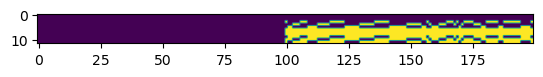

In [19]:
plt.imshow(master_buffer[-200:].T)
plt.show()

In [ ]:
rssppprrrrssssppppprrrrrrsssssspppppprrrrrsssssppppppssrpsssppprrrprsprrrrppsrrrrrsrrrrrsssr